In [1]:
!pip install tweepy
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


# Extract reviews of any products from ecommerce website like snapdeal and amazon

perform sentimental analysis___

In [2]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\shivani p
[nltk_data]     naik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\shivani p
[nltk_data]     naik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\shivani p
[nltk_data]     naik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
oneplus_reviews=[]

In [5]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [6]:
oneplus_reviews = list(set(oneplus_reviews))

In [7]:
oneplus_reviews

["\nOnePlus 7T is an excellent device and different from OnePlus 7 and could have been named as 8 instead of 7T.But THIS CANNOT BEAT OnePlus 7 Pro. Read below the Pros, mids, cons, and verdict.PROS (POSITIVES):1) Design: OnePlus 7 was not at all looking premium. But this time, the 7T is a mastered design piece. Earlier the camera bump was very ugly. Now it looks very beautiful due to its circular placement. And it looks very premium due to matte-finish and well suited for all kinds of people.2) Weight & thickness: The device doesn't feel heavy at all due to balanced weight management and it is very easy to handle due to slim 8.1 mm thickness.3) Processor: This device hosts the world's fastest processor - Snapdragon 855+ chipset processor. So everything is butter-smooth. This has been always their flagship area.4) UI: There is no smartphone user interface as simple and as powerful as on OnePlus devices. Oxygen UI is always the king of all other UIs.5) Battery: Optimised in latest Oxygen

In [8]:
txt_upd = ' '.join(oneplus_reviews)
txt_upd

'\nOnePlus 7T is an excellent device and different from OnePlus 7 and could have been named as 8 instead of 7T.But THIS CANNOT BEAT OnePlus 7 Pro. Read below the Pros, mids, cons, and verdict.PROS (POSITIVES):1) Design: OnePlus 7 was not at all looking premium. But this time, the 7T is a mastered design piece. Earlier the camera bump was very ugly. Now it looks very beautiful due to its circular placement. And it looks very premium due to matte-finish and well suited for all kinds of people.2) Weight & thickness: The device doesn\'t feel heavy at all due to balanced weight management and it is very easy to handle due to slim 8.1 mm thickness.3) Processor: This device hosts the world\'s fastest processor - Snapdragon 855+ chipset processor. So everything is butter-smooth. This has been always their flagship area.4) UI: There is no smartphone user interface as simple and as powerful as on OnePlus devices. Oxygen UI is always the king of all other UIs.5) Battery: Optimised in latest Oxyge

In [9]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [10]:
text_tokens = word_tokenize(txt_upd)

In [11]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [12]:

tf = TfidfVectorizer()

In [13]:
text_tf = tf.fit_transform(tokens_without_sw)

In [14]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df

,aah,absence,absent,absolutely,accepting,accessed,accidental,accuracy,accurate,activate,...,worried,worry,worst,xs,year,years,yellowish,youtube,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
word_list = ' '.join(df)

In [17]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

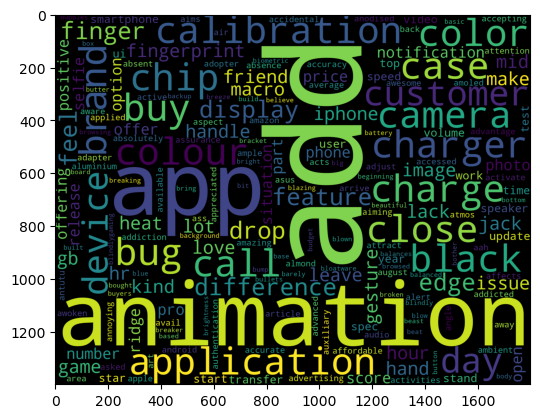

In [18]:
plt.imshow(wordcloud)

In [21]:
with open('F:\datasets\positive-words.txt') as pw:
    positive_words = pw.read().split("\n")

In [22]:
positive_words = positive_words[35:]

In [24]:
with open(r'F:\datasets\negative-words.txt', encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [25]:
negative_words = negative_words[35:]

In [26]:

txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [27]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [28]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [29]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

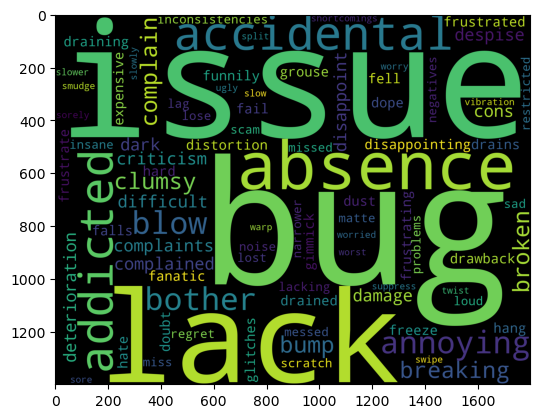

In [30]:
plt.imshow(wordcloud_neg)

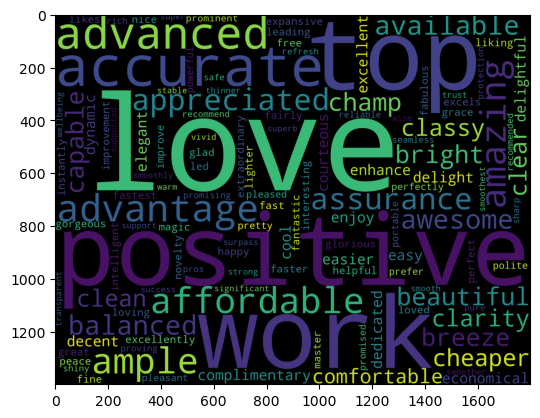

In [31]:
plt.imshow(wordcloud_pos)